## Imports

In [144]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [145]:
iris_data = load_iris(as_frame=True)
df = iris_data.frame
# Adding a new column named as target_flowers and mapping related target flower names to it
df['target_flower'] = df['target'].apply(lambda x: 'setosa' if x == 0 else 'versicolor' if x == 1 else 'virginica')

### Visualizing the data

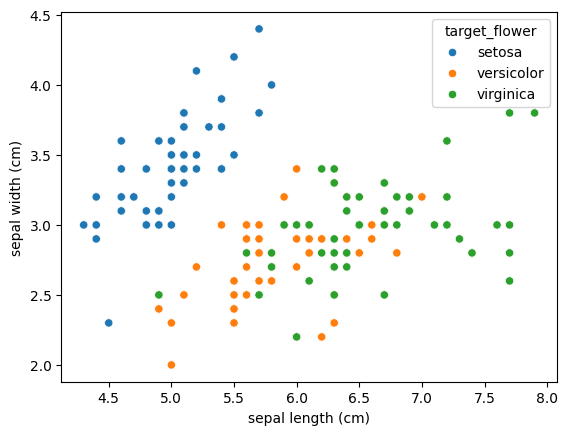

In [146]:
sns.scatterplot(df, x='sepal length (cm)', y='sepal width (cm)', hue='target_flower');

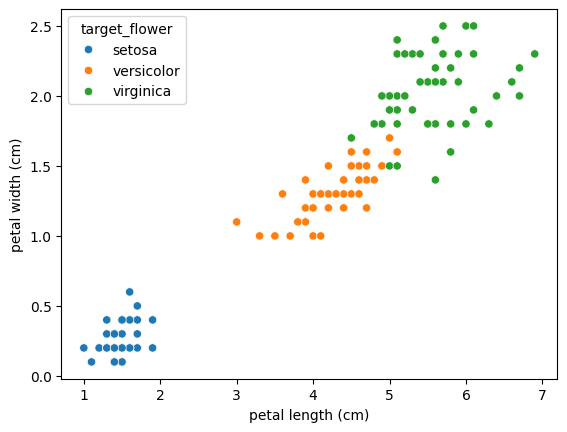

In [147]:
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='target_flower');

### Segregating the data

In [148]:
X = df.drop(['target', 'target_flower'], axis=1)
y = df['target']

### Splitting the data

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

### Training the logistic model

In [150]:
logi_model = LogisticRegression()

logi_model.fit(X_train, y_train)

y_pred = logi_model.predict(X_test)

### Evaluating the model

In [151]:
logi_model.score(X_test, y_test)

0.9666666666666667

### Using confusion matrix to plot heat map

In [152]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[43,  0,  0],
       [ 0, 36,  3],
       [ 0,  1, 37]], dtype=int64)

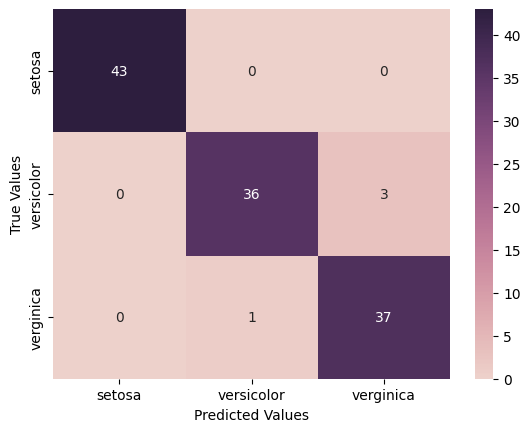

In [165]:
### Plotting heatmap uisng confusion matrix
tick_labels = ['setosa', 'versicolor', 'verginica']
sns.heatmap(conf_mat, annot=True, xticklabels=tick_labels, yticklabels=tick_labels, cmap=sns.cubehelix_palette(as_cmap=True));
plt.xlabel('Predicted Values');
plt.ylabel('True Values');